In [262]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# all of the imports
import pandas as pd
import numpy as np
import pickle 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import RidgeCV
import pickle 


%matplotlib inline

In [206]:
## loaded in Education index & country as dataframe
#df_edu = pd.read_csv('Education.csv')

,country,Education
0,Norway,0.91
1,Australia,0.927
2,Switzerland,0.844
3,Netherlands,0.894
4,United States,0.89


In [252]:
df = pd.read_csv('./data/Countries_Obesity_data.csv')# loaded in main dataframe 
df.shape

(156, 24)

In [ ]:
#merged on country with main dataframe 
df_edu_obese = pd.merge(df,df_edu,on='country') 

In [208]:
# filter df down to essential 
df = df[['country','Percent_Obese','GDPper_cap','Insufficiently_active','Education','Region_Africa','Region_Arab_States','Region_Europe','Region_Asia_Pacific','Region_Latin_America','Region_CIS','Globalization_index','Urbanization_Rate','Urban_Population','Imports']]

In [209]:
#created new columns of interactions and/or log of variables
df['log(Imports)'] = np.log(df['Imports'])
df['log(Imports)*Asia'] = df['log(Imports)']*df['Region_Asia_Pacific']
df['Asia*Urbanization'] = df['Region_Asia_Pacific']*df['Urbanization_Rate'] 
df['UrbanPop*ArabStates'] = df['Urban_Population']*df['Region_Arab_States']
df['Asia*Globalization'] = df['Region_Asia_Pacific']*df['Globalization_index']
df['Urbanization*GDPpercap'] = df['Urbanization_Rate']*np.log(df['GDPper_cap'])
df['Europe*GDPpercap'] = df['Region_Europe']*df['GDPper_cap']

In [263]:
#Save dataframe after transforming/creating variables to load and use from here on out
#df.to_csv('Obese_model_data.csv')

In [264]:
y = df['Percent_Obese']
X = df[['Insufficiently_active','Education','Region_Asia_Pacific','Urbanization_Rate','log(Imports)','Asia*Urbanization','UrbanPop*ArabStates','Asia*Globalization','Urbanization*GDPpercap','Europe*GDPpercap']]

In [265]:
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 5)
# Fit the model against the training data
lr.fit(X_train, y_train)
# Evaluate the model against the testing data
lr.score(X_test, y_test)

0.72131292896155319

In [266]:
lr1 = LinearRegression()
model = lr1.fit(X_train, y_train)
lr1.score(X_train, y_train)

0.73504479484942076

In [267]:
scores = cross_val_score(model, X, y, cv=100, scoring='neg_mean_squared_error')
print('Stratified %i folds cross validation mean' + 'Folds: %i, mean squared error: %.2f std: %.2f'
%(len(scores),np.mean(np.abs(scores)),np.std(scores)))

Stratified %i folds cross validation meanFolds: 100, mean squared error: 38.91 std: 73.11


In [300]:
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [331]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score

## Building Enet model and testing model (This was my best model)

enet = ElasticNetCV(cv=10, l1_ratio=1)
y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=1, max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)
r^2 on test data : 0.206105


In [332]:
## Building lasso model and testing performance
lasso_model = LassoCV(cv=10)
lasso = lasso_model.fit(X_train,y_train)
r2_score_lasso = lasso_model.score(X_test,y_test)
r2_score_lasso

0.20610482913004635

In [333]:
## Building Ridge regression and testing model performance
rcv = RidgeCV(cv=10)
rcv_model = rcv.fit(X_train, y_train)
rcv_model.score(X_test, y_test)

0.71510998874816123

In [334]:
#enet score for train data (slightly better than test, as expected)
enet.score(X_test,y_test)

0.20610482913004635

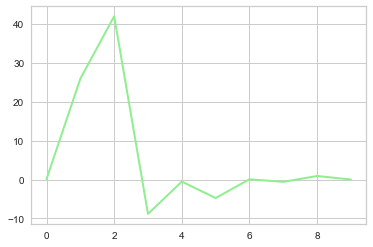

In [336]:
# Plotting enet coefficients to see their impace within model
plt.plot(rcv_model.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')

In [340]:
rcv_model.coef_

array([  1.30756940e-01,   2.58807142e+01,   4.19034538e+01,
        -8.82516905e+00,  -5.25970289e-01,  -4.74695259e+00,
         6.89731641e-02,  -5.97964227e-01,   9.05823511e-01,
        -9.44822471e-05])

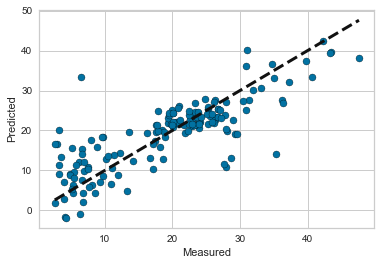

In [275]:
from sklearn.model_selection import cross_val_predict

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(enet, X, y, cv=100)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

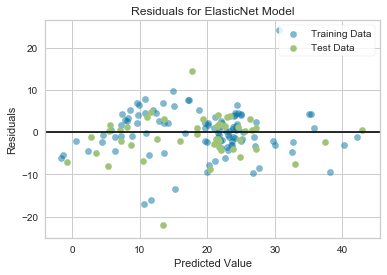

In [276]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import Ridge
from yellowbrick.regressor import AlphaSelection
from sklearn.linear_model import LassoCV
import pylab
fig = pylab.figure()

visualizer = ResidualsPlot(enet)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()        

In [278]:
#fig.savefig('resid_predict.png')
enet.params

AttributeError: 'ElasticNet' object has no attribute 'params'

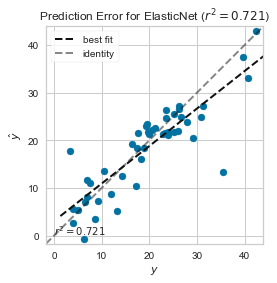

In [277]:
from yellowbrick.regressor import ManualAlphaSelection
from sklearn.linear_model import Ridge
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(enet)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000,
       n_alphas=100, n_jobs=1, normalize=False, positive=False,
       precompute='auto', random_state=None, selection='cyclic',
       tol=0.0001, verbose=0)
r^2 on test data : 0.206105


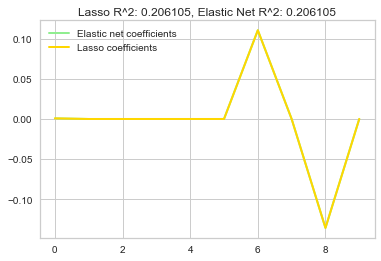

In [318]:
## Comparing Lasso,Ridge, E-net It appears Lasso model has drven most of my coefficients to 0 values 

r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

plt.plot(enet.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')
plt.plot(lasso.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
#plt.plot(rcv_model.coef_, color='blue', linewidth=2,
 #        label='ridge coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f, Elastic Net R^2: %f"
          % (r2_score_lasso, r2_score_enet))
plt.show()

In [343]:
df.sort_values('Region_Asia_Pacific',ascending=False).head(50)

,Unnamed: 0,Unnamed: 0.1,country,Percent_Obese,GDPper_cap,Insufficiently_active,Education,Region_Africa,Region_Arab_States,Region_Europe,...,Urbanization_Rate,Urban_Population,Imports,log(Imports),log(Imports)*Asia,Asia*Urbanization,UrbanPop*ArabStates,Asia*Globalization,Urbanization*GDPpercap,Europe*GDPpercap
120,121,121,Papua New Guinea,27.9,3500,14.7,0.376,0,0,0,...,2.12,13.0,1.830000e+09,21.327582,21.327582,2.12,0.0,52.71,17.300299,0
104,105,105,Philippines,5.1,7700,15.8,0.610,0,0,0,...,1.32,44.4,6.095000e+10,24.833320,24.833320,1.32,0.0,64.08,11.812648,0
23,23,23,Japan,3.3,41300,33.8,0.808,0,0,0,...,0.56,93.5,6.298000e+11,27.168668,27.168668,0.56,0.0,77.30,5.952026,0
112,113,113,Pakistan,5.4,5100,26.0,0.372,0,0,0,...,2.81,38.8,3.825000e+10,24.367409,24.367409,2.81,0.0,52.53,23.988958,0
26,26,26,New Zealand,29.2,37300,39.8,0.917,0,0,0,...,1.05,86.3,3.483000e+10,24.273745,24.273745,1.05,0.0,78.00,11.053086,0
63,64,64,Thailand,8.5,16900,14.8,0.608,0,0,0,...,2.97,50.4,1.713000e+11,25.866682,25.866682,2.97,0.0,68.15,28.913155,0
100,101,101,Bhutan,6.7,8200,8.7,0.421,0,0,0,...,3.69,38.6,1.100000e+09,20.818576,20.818576,3.69,0.0,42.69,33.253872,0
128,129,129,Nepal,3.3,2500,4.1,0.452,0,0,0,...,3.18,18.6,7.116000e+09,22.685612,22.685612,3.18,0.0,46.26,24.880466,0
126,127,127,Vanuatu,35.4,2600,8.4,0.596,0,0,0,...,3.42,26.1,3.668000e+08,19.720327,19.720327,3.42,0.0,46.07,26.892372,0
106,107,107,India,4.9,6600,13.4,0.473,0,0,0,...,2.38,32.7,4.024000e+11,26.720712,26.720712,2.38,0.0,56.77,20.931683,0
